- customerID : Customer ID
- gender : Whether the customer is a male or a female
- SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
- Partner : Whether the customer has a partner or not (Yes, No)
- Dependents : Whether the customer has dependents or not (Yes, No)
- tenure : Number of months the customer has stayed with the company
- PhoneService : Whether the customer has a phone service or not (Yes, No)
- MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract : The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges : The amount charged to the customer monthly
- TotalCharges : The total amount charged to the customer
- Churn : Whether the customer churned or not (Yes or No)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read Data

In [2]:
churn=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
listItem = []
for col in churn.columns :
    listItem.append([col, churn[col].dtype, churn[col].isna().sum(), round((churn[col].isna().sum()/len(churn[col])) * 100,2),
                    churn[col].nunique(), list(churn[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,customerID,object,0,0.0,7043,"[7746-QYVCO, 2114-MGINA]"
1,gender,object,0,0.0,2,"[Female, Male]"
2,SeniorCitizen,int64,0,0.0,2,"[1, 0]"
3,Partner,object,0,0.0,2,"[No, Yes]"
4,Dependents,object,0,0.0,2,"[Yes, No]"
5,tenure,int64,0,0.0,73,"[2, 9]"
6,PhoneService,object,0,0.0,2,"[No, Yes]"
7,MultipleLines,object,0,0.0,3,"[No, Yes]"
8,InternetService,object,0,0.0,3,"[Fiber optic, No]"
9,OnlineSecurity,object,0,0.0,3,"[Yes, No]"


## EDA

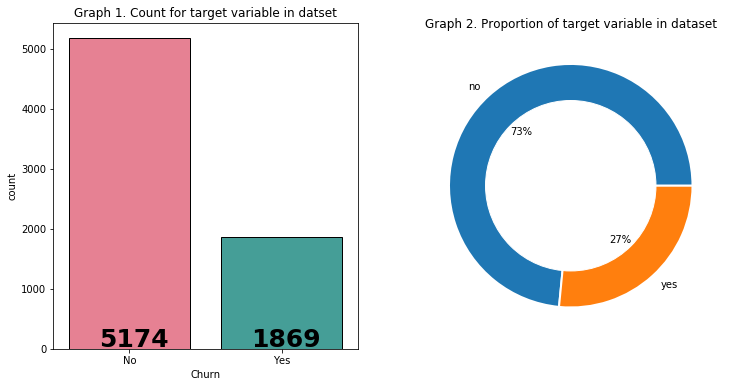

In [7]:
plt.figure(figsize=(12,6))
plt.subplot(121)
ax = sns.countplot(x = churn['Churn'],
                   palette="husl",
                   linewidth=1,
                   edgecolor="k"*2)
for i,j in enumerate(churn['Churn'].value_counts().values):
    ax.text(i-0.2,45,j,weight = "bold",fontsize = 25)
plt.title("Graph 1. Count for target variable in datset")


plt.subplot(122)
plt.pie(churn['Churn'].value_counts().values,
        labels=["no","yes"],
        autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)

plt.subplots_adjust(wspace = .2)
plt.title("Graph 2. Proportion of target variable in dataset")
plt.show()


Graph 1 and Graph 2 shows that there are 5174 or 73 % customers who is not churned and 1869 or 27 % of them churned.
We can infered that the class is imbalanced, but we're gonna keep it that way for earlier model and handle it later.

Text(0.5, 1.0, 'Graph 6. Frequency Churn based on Dependents')

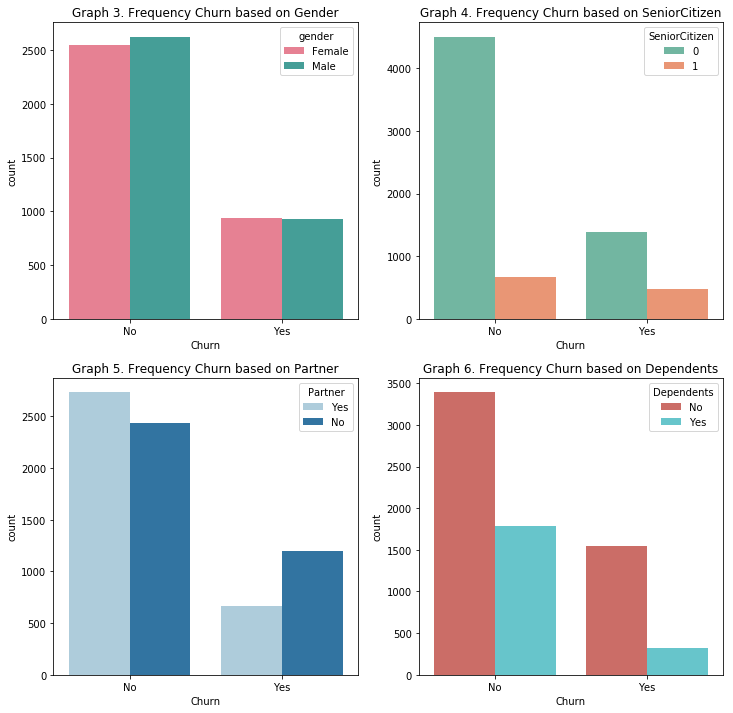

In [8]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.countplot(x='Churn', hue='gender', data=churn, palette='husl')
plt.title('Graph 3. Frequency Churn based on Gender')
plt.subplot(222)
sns.countplot(x='Churn', hue='SeniorCitizen', data=churn, palette='Set2')
plt.title('Graph 4. Frequency Churn based on SeniorCitizen')
plt.subplot(223)
sns.countplot(x='Churn', hue='Partner', data=churn, palette='Paired')
plt.title('Graph 5. Frequency Churn based on Partner')
plt.subplot(224)
sns.countplot(x='Churn', hue='Dependents', data=churn, palette='hls')
plt.title('Graph 6. Frequency Churn based on Dependents')

- Graph 3 shows that gender does not have significant influence towards churn. Because both genders almost equally distributed.
- Graph 4 shows that SeniorCitizen does not have significant influence towards churn. Because non senior citizen in both class has a higher count than senior citizenalmost equally distributed.
- Graph 5 shows that whether a customer has a partner or not is significant towards churn. Customer who does not have a partner tend to churn compare with customer who has a partner a partner
- Graph 6 shows that whether a customer has dependents or not is not significant towards churn

Text(0.5, 1.0, 'Graph 10. Frequency Churn based on OnlineSecurity')

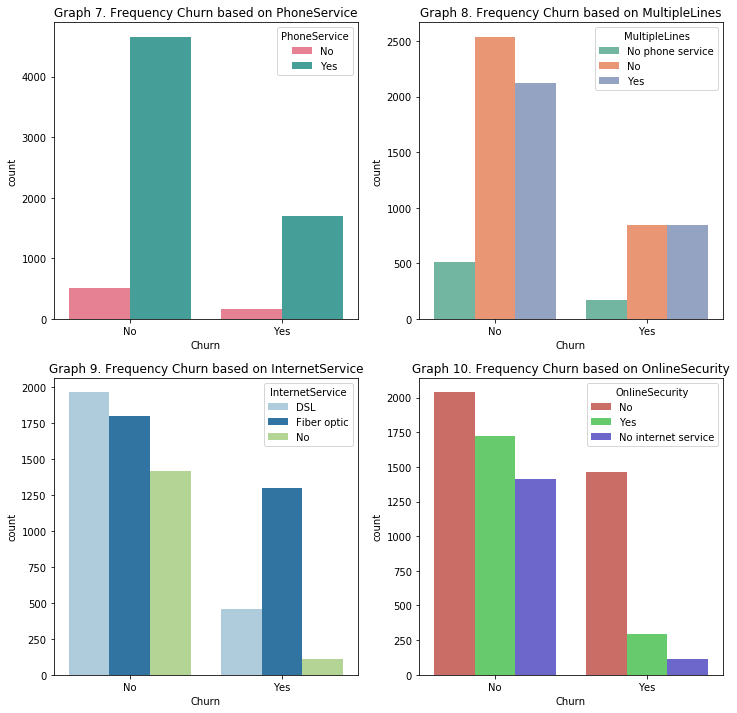

In [9]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.countplot(x='Churn', hue='PhoneService', data=churn, palette='husl')
plt.title('Graph 7. Frequency Churn based on PhoneService')
plt.subplot(222)
sns.countplot(x='Churn', hue='MultipleLines', data=churn, palette='Set2')
plt.title('Graph 8. Frequency Churn based on MultipleLines')
plt.subplot(223)
sns.countplot(x='Churn', hue='InternetService', data=churn, palette='Paired')
plt.title('Graph 9. Frequency Churn based on InternetService')
plt.subplot(224)
sns.countplot(x='Churn', hue='OnlineSecurity', data=churn, palette='hls')
plt.title('Graph 10. Frequency Churn based on OnlineSecurity')

- Graph 7 shows that whether the customer has a phone service or not is not significant towards churn. 
- Graph 8 shows that whether the customer has multiple lines or not have no significant value towards churn.
- Graph 9 shows that customer's internet service provider is significant towards churn. Customer with DSL provider an no provider tends to not churn. Meanwhile customer with fiber optic provider tend to churn. 
- Graph 10 shows that whether a customer has online security or not is not significant towards churn. 

In [10]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Text(0.5, 1.0, 'Graph 14. Frequency Churn based on StreamingTV')

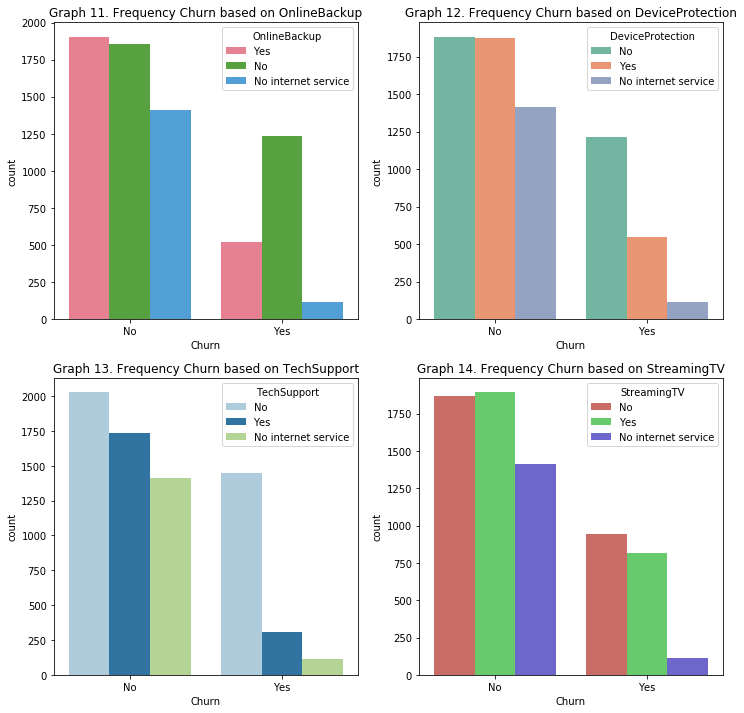

In [11]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.countplot(x='Churn', hue='OnlineBackup', data=churn, palette='husl')
plt.title('Graph 11. Frequency Churn based on OnlineBackup')
plt.subplot(222)
sns.countplot(x='Churn', hue='DeviceProtection', data=churn, palette='Set2')
plt.title('Graph 12. Frequency Churn based on DeviceProtection')
plt.subplot(223)
sns.countplot(x='Churn', hue='TechSupport', data=churn, palette='Paired')
plt.title('Graph 13. Frequency Churn based on TechSupport')
plt.subplot(224)
sns.countplot(x='Churn', hue='StreamingTV', data=churn, palette='hls')
plt.title('Graph 14. Frequency Churn based on StreamingTV')

- Graph 11 shows that Whether the customer has online backup or not is significant towards churn. Customer with no online backup tend to churn compare with the one who has it.
- Graph 12 shows that Whether the customer has device protection or not have no significant value towards churn.
- Graph 13 shows that Whether the customer has tech support or not is not significant towards churn. 
- Graph 14 shows that Whether the customer has streaming TV or not is significant towards churn. Customer with streaming TV tend to not churn

Text(0.5, 1.0, 'Graph 18. Frequency Churn based on PaymenMethod')

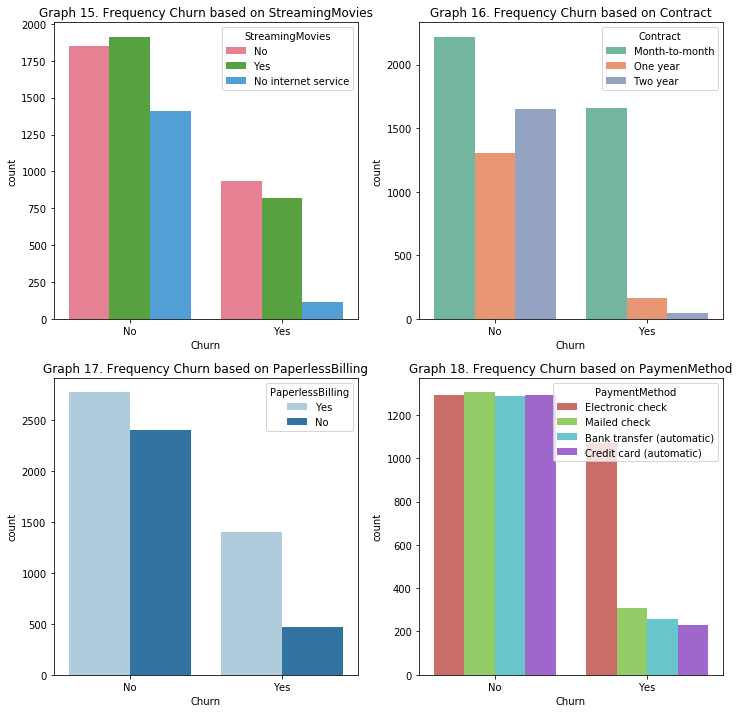

In [12]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.countplot(x='Churn', hue='StreamingMovies', data=churn, palette='husl')
plt.title('Graph 15. Frequency Churn based on StreamingMovies')
plt.subplot(222)
sns.countplot(x='Churn', hue='Contract', data=churn, palette='Set2')
plt.title('Graph 16. Frequency Churn based on Contract')
plt.subplot(223)
sns.countplot(x='Churn', hue='PaperlessBilling', data=churn, palette='Paired')
plt.title('Graph 17. Frequency Churn based on PaperlessBilling')
plt.subplot(224)
sns.countplot(x='Churn', hue='PaymentMethod', data=churn, palette='hls')
plt.title('Graph 18. Frequency Churn based on PaymenMethod')

- Graph 15 shows that Whether the customer has streaming movies or not is significant towards churn. Customer who does not streaming movies tend to churn compare with the one who does.
- Graph 16 shows that The contract term of the customer have significant value towards churn. Customer with month-to-month contract tend to churn compare to customer with one year or two year contract
- Graph 17 shows that Whether the customer has paperless billing or not is not significant towards churn. 
- Graph 18 shows that The customer’s payment method is significant towards churn. Customer with electronic check tend to churn compare with mailed check, bank transfer, or credit card.

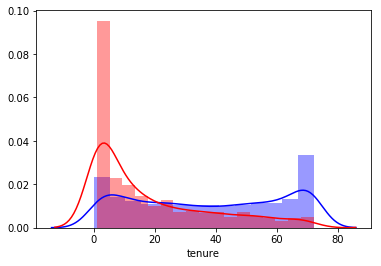

In [13]:
sns.distplot(churn[churn['Churn']=='No']['tenure'], color='blue')
sns.distplot(churn[churn['Churn']=='Yes']['tenure'], color='red')

Text(0.5, 1.0, 'Two year Contract')

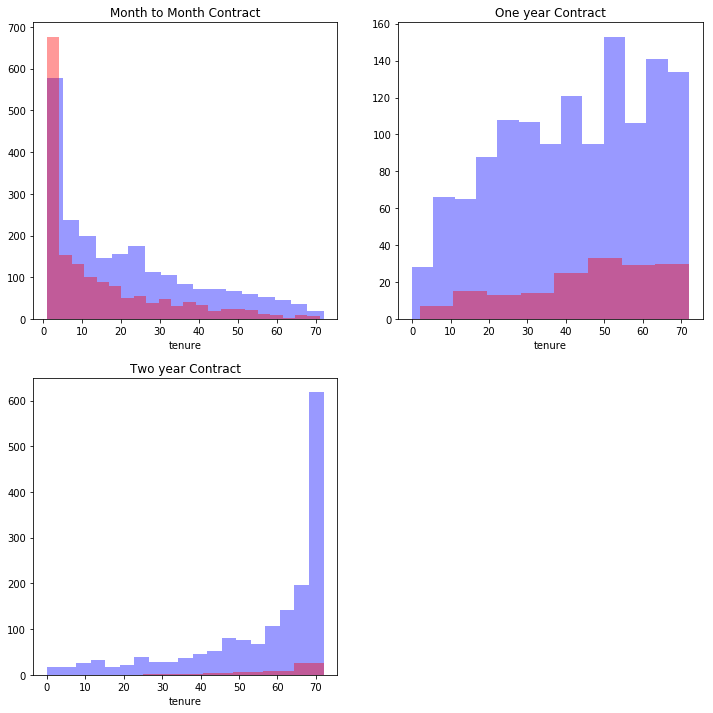

In [14]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.distplot(churn[(churn['Churn']=='No') & (churn['Contract']=='Month-to-month')]['tenure'], color='blue', kde=False)
sns.distplot(churn[(churn['Churn']=='Yes') & (churn['Contract']=='Month-to-month')]['tenure'], color='red', kde=False)
plt.title('Month to Month Contract')
plt.subplot(222)
sns.distplot(churn[(churn['Churn']=='No') & (churn['Contract']=='One year')]['tenure'], color='blue', kde=False)
sns.distplot(churn[(churn['Churn']=='Yes') & (churn['Contract']=='One year')]['tenure'], color='red', kde=False)
plt.title('One year Contract')
plt.subplot(223)
sns.distplot(churn[(churn['Churn']=='No') & (churn['Contract']=='Two year')]['tenure'], color='blue', kde=False)
sns.distplot(churn[(churn['Churn']=='Yes') & (churn['Contract']=='Two year')]['tenure'], color='red', kde=False)
plt.title('Two year Contract')

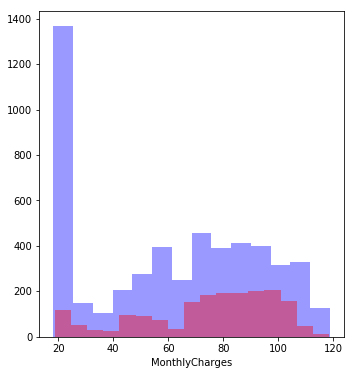

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(churn[churn['Churn']=='No']['MonthlyCharges'], color='blue', kde=False)
sns.distplot(churn[churn['Churn']=='Yes']['MonthlyCharges'], color='red', kde=False)
# plt.subplot(122)
# sns.distplot(churn[churn['Churn']=='No']['TotalCharges'], color='blue', kde=False)
# sns.distplot(churn[churn['Churn']=='Yes']['TotalCharges'], color='red', kde=False)

In [21]:
x = churn.drop('Churn', axis = 1)
y = churn['Churn']

### Labelling

### Data Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)